In [ ]:
# BPIC20_DomesticDeclarations — Event Log EDA (days)
# Explore: schema, activities, cases, durations, next-time deltas, variants, DFG pairs, timelines.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PATH = "/ceph/lfertig/Thesis/data/processed/df_bpic20_domestic.csv.gz"
CASE_COL = "case:concept:name"
ACT_COL  = "concept:name"
TIME_COL = "time:timestamp"

In [4]:
df = pd.read_csv(PATH, low_memory=False)
print("Shape:", df.shape)
print("Columns:", list(df.columns))
df.info()
display(df.head(25))

Shape: (56437, 5)
Columns: ['case:concept:name', 'concept:name', 'time:timestamp', '@@index', '@@case_index']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56437 entries, 0 to 56436
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   case:concept:name  56437 non-null  object
 1   concept:name       56437 non-null  object
 2   time:timestamp     56437 non-null  object
 3   @@index            56437 non-null  int64 
 4   @@case_index       56437 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ MB


,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,declaration 100000,Declaration SUBMITTED by EMPLOYEE,2018-01-30 09:20:07+00:00,0,0
1,declaration 100000,Declaration APPROVED by ADMINISTRATION,2018-02-07 09:58:46+00:00,1,1
2,declaration 100000,Declaration FINAL_APPROVED by SUPERVISOR,2018-02-08 10:59:05+00:00,2,2
3,declaration 100000,Request Payment,2018-02-09 12:42:49+00:00,3,3
4,declaration 100000,Payment Handled,2018-02-12 17:31:20+00:00,4,4
5,declaration 100005,Declaration SUBMITTED by EMPLOYEE,2018-01-30 09:38:54+00:00,5,0
6,declaration 100005,Declaration APPROVED by ADMINISTRATION,2018-01-30 09:38:57+00:00,6,1
7,declaration 100005,Declaration FINAL_APPROVED by SUPERVISOR,2018-01-30 10:04:10+00:00,7,2
8,declaration 100005,Request Payment,2018-01-31 12:45:18+00:00,8,3
9,declaration 100005,Payment Handled,2018-02-01 17:31:17+00:00,9,4


In [5]:
# Parse timestamps, basic sanity checks, sort
assert CASE_COL in df.columns and ACT_COL in df.columns and TIME_COL in df.columns, "Expected columns missing."
df[TIME_COL] = pd.to_datetime(df[TIME_COL], utc=True, errors="coerce")
assert df[TIME_COL].notna().any(), "All timestamps are NaT—check the time column."
df = df.sort_values([CASE_COL, TIME_COL]).reset_index(drop=True)

# High-level counts
n_events = len(df)
n_cases  = df[CASE_COL].nunique()
n_acts   = df[ACT_COL].nunique()
print(f"Events: {n_events:,} | Cases: {n_cases:,} | Activities: {n_acts:,}")

Events: 56,437 | Cases: 10,500 | Activities: 17


,count,mean,std,min,50%,90%,95%,99%,max
events_per_case,10500.0,5.374952,1.486415,1.0,5.0,6.0,8.0,11.0,24.0


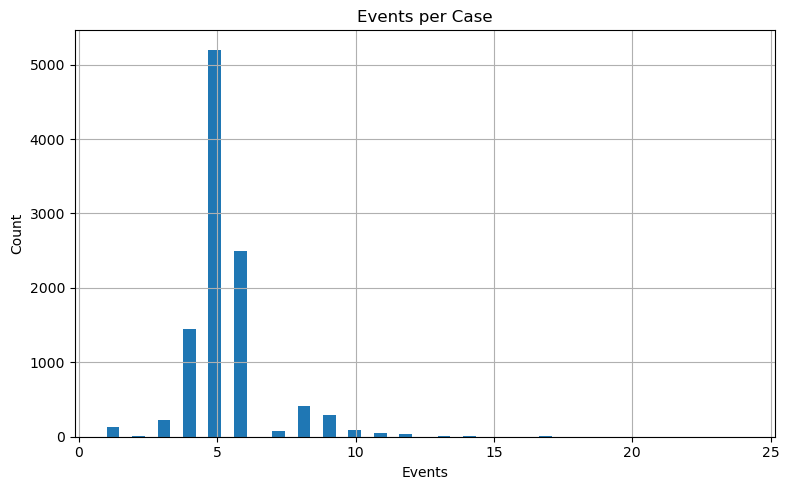

In [6]:
# Events per case
ev_per_case = df.groupby(CASE_COL, sort=False).size().rename("events_per_case")
ev_stats = ev_per_case.describe(percentiles=[0.5, 0.9, 0.95, 0.99])
display(ev_stats.to_frame().T)

plt.figure(figsize=(8,5))
plt.hist(ev_per_case, bins=50)
plt.title("Events per Case"); plt.xlabel("Events"); plt.ylabel("Count")
plt.grid(True); plt.tight_layout(); plt.show()

,count,mean,std,min,50%,90%,95%,99%,max
case_duration_days,10500.0,11.525551,17.020116,0.0,7.330509,20.112541,29.195221,76.295001,469.277986


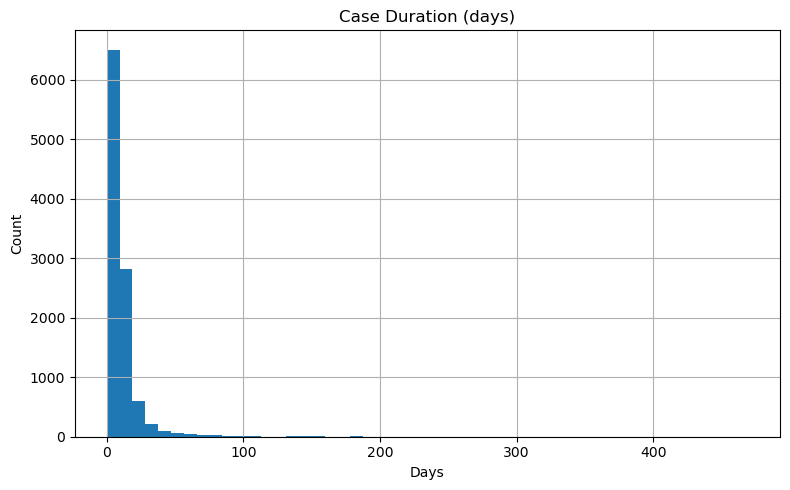

,days
case:concept:name,
declaration 100723,469.277986
declaration 101989,368.193449
declaration 100197,344.318148
declaration 126246,290.905498
declaration 115669,286.073218
declaration 98152,282.980150
declaration 103881,265.644757
declaration 102487,249.980451
declaration 99294,249.966736


,days
case:concept:name,
declaration 132490,0.0
declaration 143064,0.0
declaration 143066,0.0
declaration 100880,0.0
declaration 110524,0.0
declaration 90795,0.0
declaration 93080,0.0
declaration 96649,0.0
declaration 115887,0.0


In [7]:
# Case durations (days): end - start per case
g = df.groupby(CASE_COL, sort=False)[TIME_COL]
case_start = g.min()
case_end   = g.max()
case_duration_days = (case_end - case_start).dt.total_seconds() / 86400.0
dur_stats = case_duration_days.describe(percentiles=[0.5, 0.9, 0.95, 0.99]).rename("case_duration_days")
display(dur_stats.to_frame().T)

plt.figure(figsize=(8,5))
plt.hist(case_duration_days, bins=50)
plt.title("Case Duration (days)"); plt.xlabel("Days"); plt.ylabel("Count")
plt.grid(True); plt.tight_layout(); plt.show()

# Top/bottom cases by duration
display(case_duration_days.sort_values(ascending=False).head(10).to_frame("days"))
display(case_duration_days.sort_values(ascending=True).head(10).to_frame("days"))

,count,mean,std,min,50%,90%,95%,99%,max
next_time_delta_days,45937.0,2.63444,7.930367,0.0,1.016713,5.212692,7.115576,23.815054,469.277986


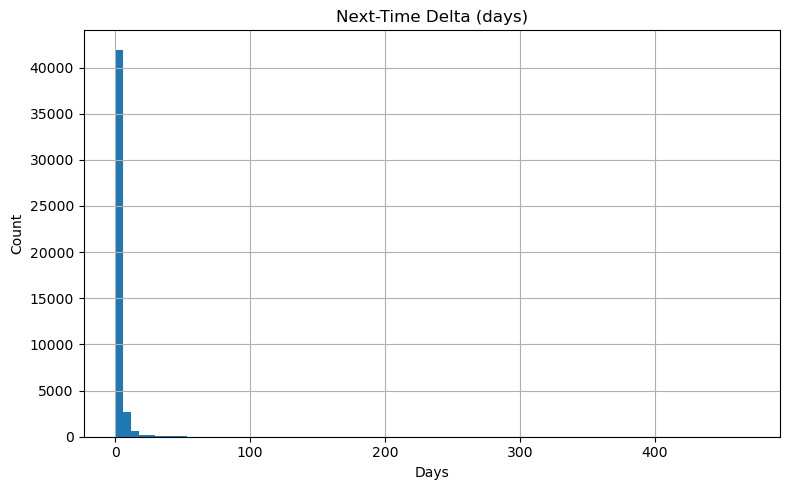

In [8]:
# Next-time deltas (days): within-case differences between consecutive events
df["next_time_delta_days"] = (
    df.groupby(CASE_COL, sort=False)[TIME_COL]
      .diff()
      .dt.total_seconds() / 86400.0
)
ntd = df["next_time_delta_days"].dropna()
ntd_stats = ntd.describe(percentiles=[0.5, 0.9, 0.95, 0.99]).rename("next_time_delta_days")
display(ntd_stats.to_frame().T)

plt.figure(figsize=(8,5))
plt.hist(ntd, bins=80)
plt.title("Next-Time Delta (days)"); plt.xlabel("Days"); plt.ylabel("Count")
plt.grid(True); plt.tight_layout(); plt.show()

,case_starts
concept:name,
Declaration SUBMITTED by EMPLOYEE,10365
Declaration SAVED by EMPLOYEE,135


,case_ends
concept:name,
Payment Handled,10043
Declaration REJECTED by EMPLOYEE,284
Declaration SAVED by EMPLOYEE,134
Declaration REJECTED by MISSING,30
Declaration REJECTED by ADMINISTRATION,5
Declaration REJECTED by SUPERVISOR,4


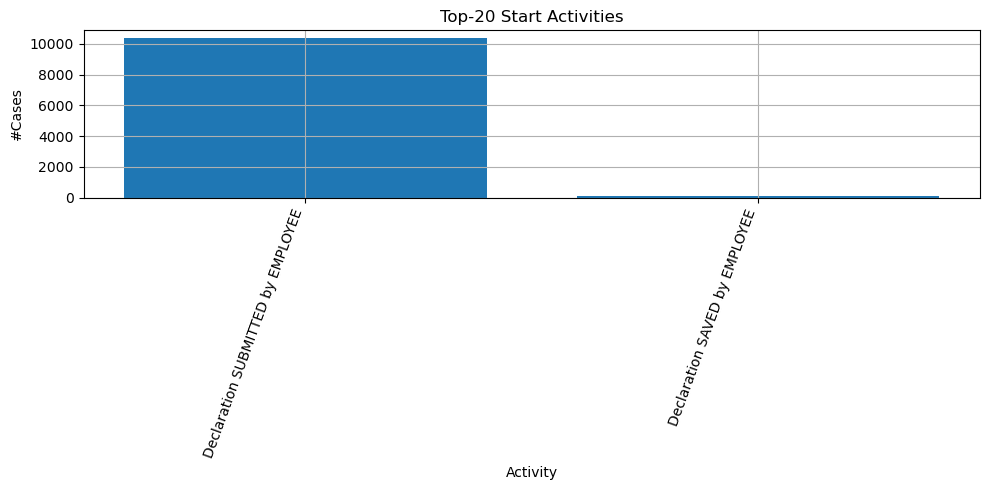

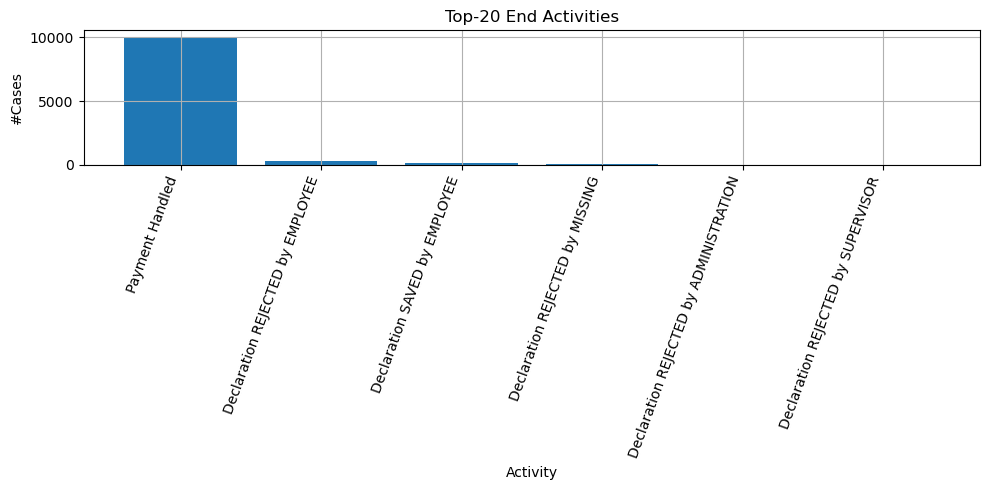

In [9]:
# Start/End activities
first_acts = df.groupby(CASE_COL, sort=False).first()[ACT_COL].value_counts()
last_acts  = df.groupby(CASE_COL, sort=False).last()[ACT_COL].value_counts()
display(first_acts.head(20).to_frame("case_starts"))
display(last_acts.head(20).to_frame("case_ends"))

plt.figure(figsize=(10,5))
plt.bar(first_acts.head(20).index.astype(str), first_acts.head(20).values)
plt.title("Top-20 Start Activities"); plt.xlabel("Activity"); plt.ylabel("#Cases")
plt.xticks(rotation=70, ha="right"); plt.grid(True); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.bar(last_acts.head(20).index.astype(str), last_acts.head(20).values)
plt.title("Top-20 End Activities"); plt.xlabel("Activity"); plt.ylabel("#Cases")
plt.xticks(rotation=70, ha="right"); plt.grid(True); plt.tight_layout(); plt.show()

,from,to,count
0,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,10038
1,Request Payment,Payment Handled,10037
2,Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by ADMINISTRATION,8202
3,Declaration APPROVED by ADMINISTRATION,Declaration FINAL_APPROVED by SUPERVISOR,5133
4,Declaration APPROVED by ADMINISTRATION,Declaration APPROVED by BUDGET OWNER,2820
5,Declaration APPROVED by BUDGET OWNER,Declaration FINAL_APPROVED by SUPERVISOR,2788
6,Declaration SUBMITTED by EMPLOYEE,Declaration FINAL_APPROVED by SUPERVISOR,1536
7,Declaration REJECTED by EMPLOYEE,Declaration SUBMITTED by EMPLOYEE,1081
8,Declaration SUBMITTED by EMPLOYEE,Declaration REJECTED by ADMINISTRATION,952
9,Declaration REJECTED by ADMINISTRATION,Declaration REJECTED by EMPLOYEE,928


/tmp/ipykernel_3992775/1736435071.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.xticks(rotation=70, ha="right"); plt.grid(True); plt.tight_layout(); plt.show()


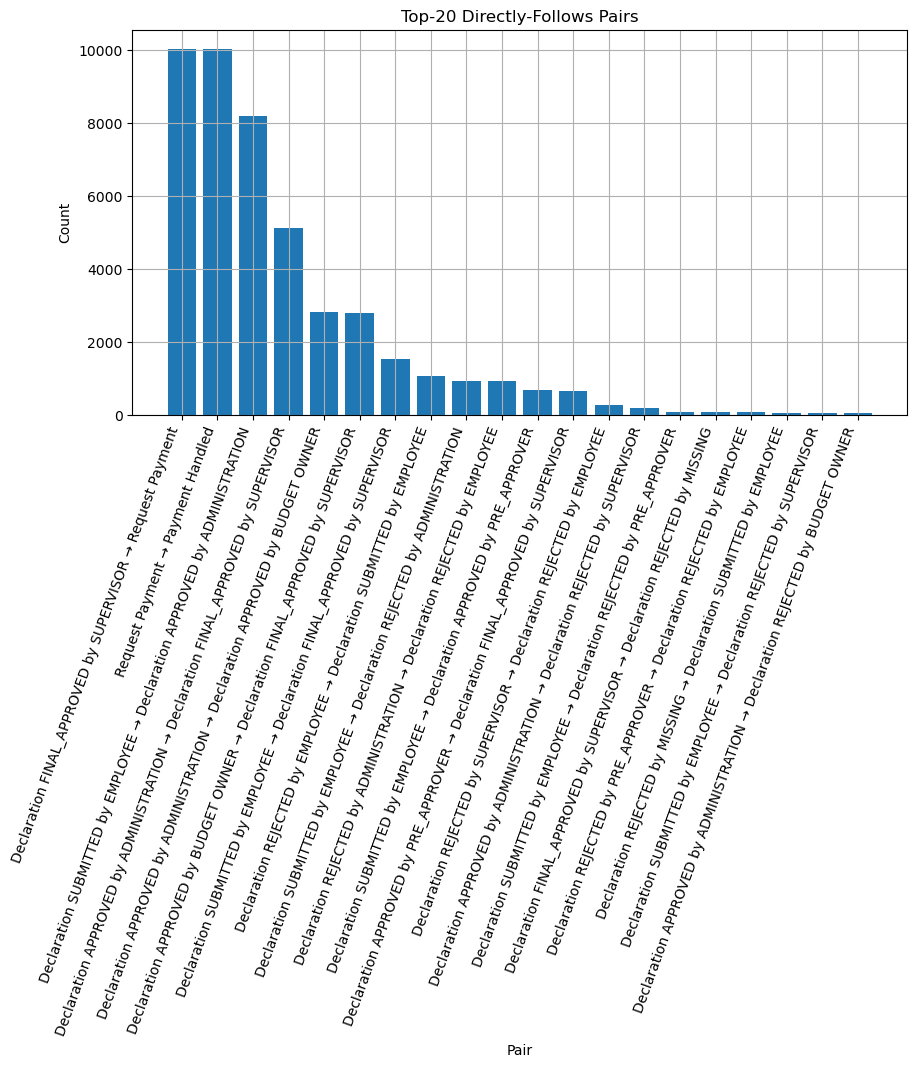

In [10]:
# Directly-Follows Graph (DFG) counts: bigrams within cases
def dfg_counts(df, case_col, act_col):
    pairs = []
    for _, g in df.groupby(case_col, sort=False):
        acts = g[act_col].dropna().tolist()
        if len(acts) > 1:
            pairs.extend(zip(acts[:-1], acts[1:]))

    s = pd.Series(pairs)
    vc = s.value_counts()  # index: tuples like ('A','B'), values: counts

    # Make it a MultiIndex so we can name the levels and reset cleanly
    vc.index = pd.MultiIndex.from_tuples(vc.index, names=["from", "to"])
    dfg_df = vc.reset_index(name="count")
    return dfg_df

dfg_df = dfg_counts(df, CASE_COL, ACT_COL)
display(dfg_df.head(20))

plt.figure(figsize=(10,5))
top_pairs = dfg_df.head(20)
labels = [f"{a} \u2192 {b}" for a, b in zip(top_pairs["from"], top_pairs["to"])]
plt.bar(labels, top_pairs["count"].values)
plt.title("Top-20 Directly-Follows Pairs"); plt.xlabel("Pair"); plt.ylabel("Count")
plt.xticks(rotation=70, ha="right"); plt.grid(True); plt.tight_layout(); plt.show()

/tmp/ipykernel_3992775/3733048281.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(case_variant)


,count,cumulative_coverage
Declaration SUBMITTED by EMPLOYEE → Declaration APPROVED by ADMINISTRATION → Declaration FINAL_APPROVED by SUPERVISOR → Request Payment → Payment Handled,4618,0.439810
Declaration SUBMITTED by EMPLOYEE → Declaration APPROVED by ADMINISTRATION → Declaration APPROVED by BUDGET OWNER → Declaration FINAL_APPROVED by SUPERVISOR → Request Payment → Payment Handled,2473,0.675333
Declaration SUBMITTED by EMPLOYEE → Declaration FINAL_APPROVED by SUPERVISOR → Request Payment → Payment Handled,1392,0.807905
Declaration SUBMITTED by EMPLOYEE → Declaration APPROVED by PRE_APPROVER → Declaration FINAL_APPROVED by SUPERVISOR → Request Payment → Payment Handled,575,0.862667
Declaration SUBMITTED by EMPLOYEE → Declaration REJECTED by ADMINISTRATION → Declaration REJECTED by EMPLOYEE → Declaration SUBMITTED by EMPLOYEE → Declaration APPROVED by ADMINISTRATION → Declaration FINAL_APPROVED by SUPERVISOR → Request Payment → Payment Handled,345,0.895524
Declaration SUBMITTED by EMPLOYEE → Declaration REJECTED by ADMINISTRATION → Declaration REJECTED by EMPLOYEE → Declaration SUBMITTED by EMPLOYEE → Declaration APPROVED by ADMINISTRATION → Declaration APPROVED by BUDGET OWNER → Declaration FINAL_APPROVED by SUPERVISOR → Request Payment → Payment Handled,188,0.913429
Declaration SUBMITTED by EMPLOYEE → Declaration REJECTED by ADMINISTRATION → Declaration REJECTED by EMPLOYEE,174,0.930000
Declaration SAVED by EMPLOYEE,134,0.942762
Declaration SUBMITTED by EMPLOYEE → Declaration APPROVED by ADMINISTRATION → Declaration REJECTED by SUPERVISOR → Declaration REJECTED by EMPLOYEE → Declaration SUBMITTED by EMPLOYEE → Declaration APPROVED by ADMINISTRATION → Declaration FINAL_APPROVED by SUPERVISOR → Request Payment → Payment Handled,77,0.950095
Declaration SUBMITTED by EMPLOYEE → Declaration REJECTED by PRE_APPROVER → Declaration REJECTED by EMPLOYEE → Declaration SUBMITTED by EMPLOYEE → Declaration APPROVED by PRE_APPROVER → Declaration FINAL_APPROVED by SUPERVISOR → Request Payment → Payment Handled,57,0.955524


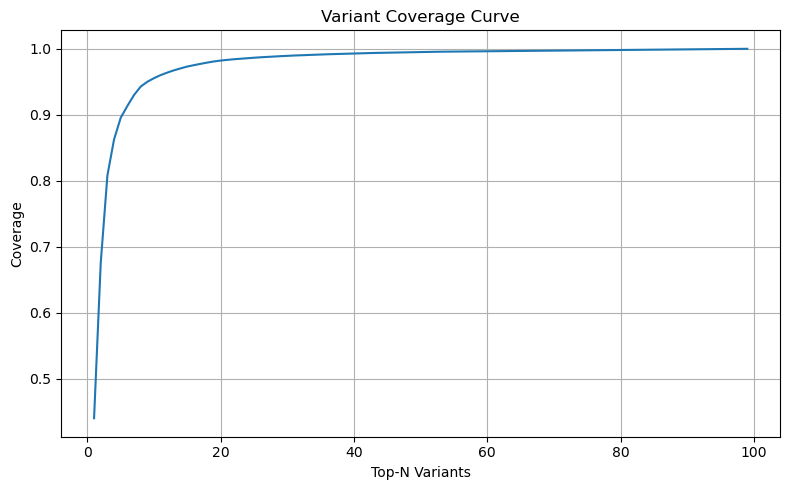

In [11]:
# Variants (activity sequences per case)
def case_variant(g):
    return " → ".join(g[ACT_COL].tolist())

variants = (
    df.groupby(CASE_COL, sort=False)
      .apply(case_variant)
      .value_counts()
)
coverage = (variants.cumsum() / variants.sum()).rename("cumulative_coverage")
top_variants = pd.concat([variants.rename("count"), coverage], axis=1).head(20)
display(top_variants)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(coverage)+1), coverage.values)
plt.title("Variant Coverage Curve"); plt.xlabel("Top-N Variants"); plt.ylabel("Coverage")
plt.grid(True); plt.tight_layout(); plt.show()

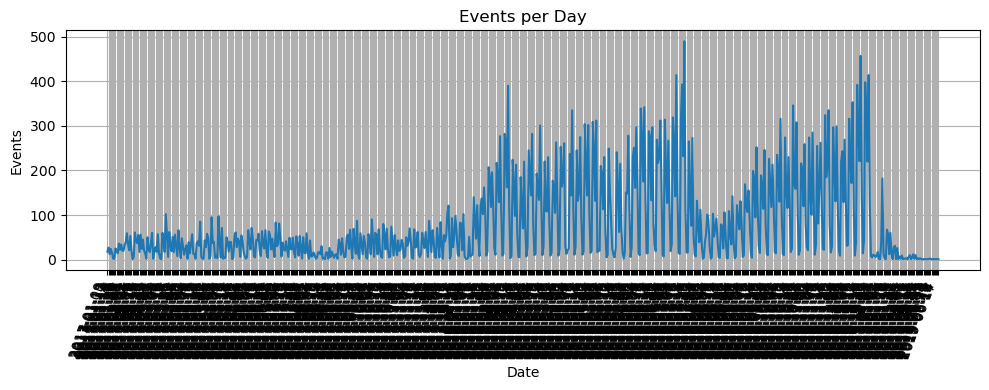

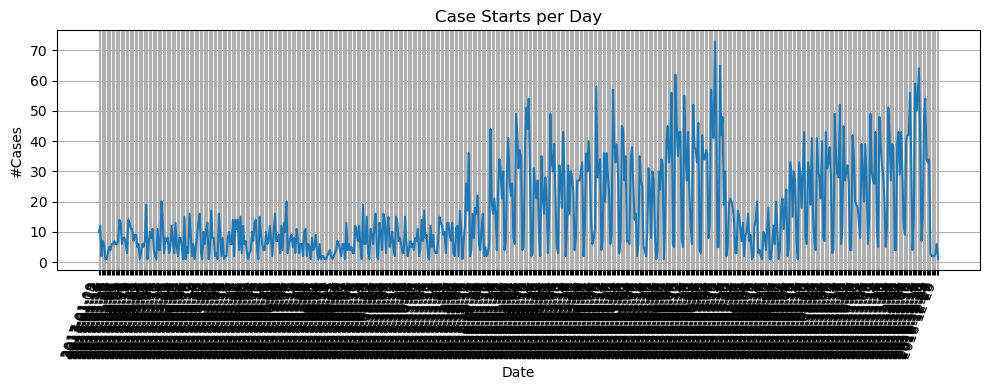

In [12]:
# Timeline views (event counts per day; case starts per day)
df["event_date"] = df[TIME_COL].dt.tz_convert(None).dt.date
events_per_day = pd.Series(df["event_date"]).value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.plot(events_per_day.index.astype(str), events_per_day.values)
plt.title("Events per Day"); plt.xlabel("Date"); plt.ylabel("Events")
plt.xticks(rotation=70, ha="right"); plt.grid(True); plt.tight_layout(); plt.show()

case_start_date = case_start.dt.tz_convert(None).dt.date
starts_per_day = case_start_date.value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.plot(starts_per_day.index.astype(str), starts_per_day.values)
plt.title("Case Starts per Day"); plt.xlabel("Date"); plt.ylabel("#Cases")
plt.xticks(rotation=70, ha="right"); plt.grid(True); plt.tight_layout(); plt.show()

In [13]:
# Missing values overview
na = df.isna().sum().sort_values(ascending=False)
display(na.to_frame("n_missing").T)

,next_time_delta_days,case:concept:name,concept:name,time:timestamp,@@index,@@case_index,event_date
n_missing,10500,0,0,0,0,0,0


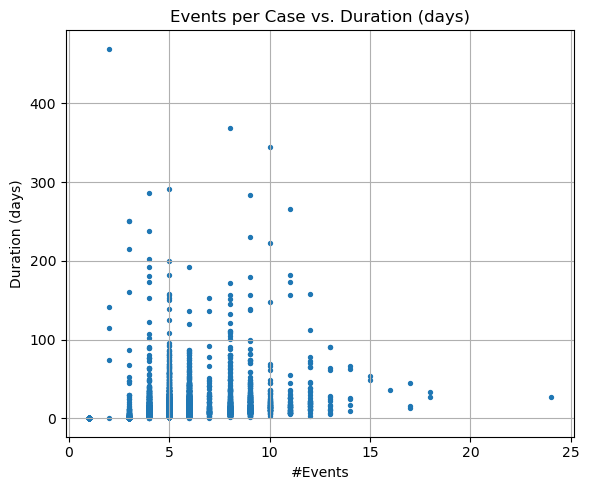

In [14]:
# Correlate events-per-case vs. duration (days) (quick scatter in matplotlib)
aligned = pd.DataFrame({
    "events_per_case": ev_per_case,
    "duration_days": case_duration_days
}).dropna()

plt.figure(figsize=(6,5))
plt.scatter(aligned["events_per_case"], aligned["duration_days"], s=8)
plt.title("Events per Case vs. Duration (days)")
plt.xlabel("#Events"); plt.ylabel("Duration (days)")
plt.grid(True); plt.tight_layout(); plt.show()

In [15]:
print("EDA complete.")

EDA complete.
